# Trabajo 1 Metodos Estadísticos

In [9]:
#son necesarios 4 paquetes
# es necesario instalarlos antes de cargarlos.
library(car)
library(leaps)
library(perturb)
library(tseries)
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Pulse el botón para ver el código.">
 </form>'
)

## Integrantes: 

## Enunciado: 

1. Estime un modelo de regresión lineal múltiple que explique el precio de venta de las casas en términos de todas las
variables predictoras. Analice la signifícancia de la regresión y de los parámetros individuales. Calcule e interprete el
coefíciente de determinación múltiple R2. Comente los resultados.
2. Probar la significancia simultánea del subconjunto de tres variables con los valores p mayores del punto anterior. Según el resultado de la prueba es posible descartar del modelo las variables del subconjunto?.
3. Use la información pertinente para determinar si la multicolinealidad es un problema potencial.
4. Usando el método backward determine cuales son las predictoras que deben estar en el modelo. ¿ Concuerda este modelo con el determinado en primer inciso? Además use los otros criterios vistos en clase para mostrar 2 candidatos a mejor modelo. Argumente.
5. Realice una validación de los supuestos en los errores y examine si hay valores atípicos, de balanceo e influyentes. Qué puede decir acerca de la validez de éste modelo?. Argumente.

In [1]:
#lee el archivo .txt
datos<-read.table(file.choose(), header=T )
#CARGA BASE DE DATOS Y NOMBRES DE VARIABLES EN R
attach(datos)
#muestra datos
datos


Y,X1,X2,X3,X4,X5
34.7,6.506,6.204,1.392,5,37
40.6,9.200,7.980,2.000,5,30
28.9,5.604,9.520,1.501,6,32
31.0,6.271,6.520,0.975,6,28
25.9,4.918,3.472,0.998,7,42
25.9,3.891,2.275,0.567,4,3
25.9,4.557,4.050,1.232,6,54
30.9,5.898,5.850,1.240,7,51
29.5,5.858,4.587,1.101,5,45
27.9,4.543,2.275,1.175,6,40


### 1. Estime un modelo de regresión lineal múltiple que explique el precio de venta de las casas en términos de todas las variables predictoras. Analice la signifícancia de la regresión y de los parámetros individuales. Calcule e interprete el coefíciente de determinación múltiple R2. Comente los resultados.


In [3]:
#AJUSTE DEL MODELO
modelo<-lm(Y~X1+X2+X3+X4+X5)

summary(modelo)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9255 -2.1451  0.1387  1.5355  5.9562 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.963411   3.863012   2.320   0.0291 *  
X1           3.107643   0.537314   5.784 5.81e-06 ***
X2          -0.112221   0.414986  -0.270   0.7891    
X3           1.879014   0.880188   2.135   0.0432 *  
X4           0.598985   0.712458   0.841   0.4088    
X5          -0.002084   0.041069  -0.051   0.9599    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.188 on 24 degrees of freedom
Multiple R-squared:  0.8267,	Adjusted R-squared:  0.7906 
F-statistic: 22.89 on 5 and 24 DF,  p-value: 2.052e-08



En este modelo el parametro $\beta_0$ tiene interpretación estadistica, ya que, como se observa en la tabla anterior, el punto $\vec{0}$ pertenece al rango de los valores, el cual es: $[-4.9255,5.9562]$

## hipotesis a evaluar: 

$ H_o : \beta_1=\beta_2=\beta_3=\beta_4=\beta_5=0 $

$ Ha: B_k \neq 0$


De lo anterior se puede concluir que:

$$P_{value} < \alpha $$

$$2.05x10^{-8} < 0.05$$

además: $F_{0.05,5,24} = 2.621$ y $F_0 = 22.894$ por lo tanto $F_{0.05,5,24} < F_0$ por todo lo anterior, se rechaza la hipotesis nula y se toma la hipotesis alternativa lo que quiere decir que existe por lo menos un $B_k$ que ayude a explicar el modelo.

Ahora se estudiará la significancia individual para cada parametro.

In [4]:
#PARA OBTENER LA ANOVA DEL MODELO DE RLM CREAMOS LA SIGUIENTE FUNCI?N
miAnova<-function(modeloreg){
  SSq<-unlist(anova(modeloreg)["Sum Sq"])
  k<-length(SSq)-1
  SSR<-sum(SSq[1:k])
  SSE<-SSq[(k+1)]
  MSR<-SSR/k
  df.error<-unlist(anova(modeloreg)["Df"])[k+1]
  MSE<-SSE/df.error
  F0<-MSR/MSE
  VP<-pf(F0,k,df.error,lower.tail=F)
  result<-
    data.frame(SumSq=c(SSR,SSE),Df=c(k,df.error),MeanSq=c(MSR,MSE),F0=c(round(F0,digits=3),' '),
               P.value=c(format(VP,scientific = TRUE,digits=3),' '),row.names =c("Modelo","Error"))
  cat("Tabla ANOVA Modelo de Regresi?n","\n")
  result
}

miAnova(modelo)

Tabla ANOVA Modelo de Regresi?n 


,SumSq,Df,MeanSq,F0,P.value
Modelo,1163.5619,5,232.7124,22.894,2.05e-08
Error,243.9527,24,10.1647,,


## Pruebas de significancia individual:

* para $\beta_1$: 
$$H_0: \beta_1 =0$$
  $$H_1: \beta_1 \neq 0$$

* para $\beta_2$:  
$$H_0: \beta_2 =0$$
  $$H_1: \beta_2 \neq 0$$

* para $\beta_3$:
$$H_0: \beta_3 =0$$
  $$H_1: \beta_3 \neq 0$$

* para $\beta_4$:
$$H_0: \beta_4 =0$$
  $$H_1: \beta_4 \neq 0$$

* para $\beta_5$:
$$H_0: \beta_5 =0$$
  $$H_1: \beta_5 \neq 0$$
  
  como nuestro $\alpha = 0.05$ es posible realizar pruebas usando el resumen del modelo generado por R:

In [5]:
#AJUSTE DEL MODELO
modelo<-lm(Y~X1+X2+X3+X4+X5)
print("Modelo: ")
summary(modelo)


[1] "Modelo: "



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9255 -2.1451  0.1387  1.5355  5.9562 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.963411   3.863012   2.320   0.0291 *  
X1           3.107643   0.537314   5.784 5.81e-06 ***
X2          -0.112221   0.414986  -0.270   0.7891    
X3           1.879014   0.880188   2.135   0.0432 *  
X4           0.598985   0.712458   0.841   0.4088    
X5          -0.002084   0.041069  -0.051   0.9599    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.188 on 24 degrees of freedom
Multiple R-squared:  0.8267,	Adjusted R-squared:  0.7906 
F-statistic: 22.89 on 5 and 24 DF,  p-value: 2.052e-08


si Pr(>|t|) $> \alpha$ no rechaza la hipotesis nula y se elimina el parametro del modelo:

en $X_1: Pr=5.81x10^{-6} < 0.05$ por lo tanto $H_0$  se rechaza 


en $X_2: Pr=0.7891 > 0.05$ por lo tanto no se rechaza $H_0$ y se eliminará el parametro del modelo 


en $X_3: Pr=0.0432< 0.05$ por lo tanto se rechaza $H_0$  


en $X_4: Pr=0.4088 > 0.05$ por lo tanto  no se rechaza $H_0$ y se eliminará el parametro del modelo 

en $X_5: Pr=0.9599 > 0.05$ por lo tanto no se rechaza $H_0$ y se eliminará el parametro del modelo 

Luego, el modelo contará con los parametros $\beta_1$ y $\beta_3$. Además, de la tabla ANOVA del Modelo de Regresion (que ya ha sido mostrada anteriormente) se obtiene el valor de $\text{R}^2$ realizando el cociente entre la SumSq del modelo y la SumSq Total definida como la suma entre la SumSq del modelo y la SumSq del error, asi obtenermos que $\text{R}^2 = 0.8267$ por tanto se afirma que el $82\%$ de la vadiabilidad de los datos es explicada por el modelo.
(Nota: Para mayor facilidad el $\text{R}^2$ tambien puede ser obtenido a partir de la tabla anterior, se encuentra como "Multiple R-squared".)



### 2. Probar la significancia simultánea del subconjunto de tres variables con los valores p mayores del punto anterior. Según el resultado de la prueba es posible descartar del modelo las variables del subconjunto?.

In [6]:
#TABLA DE TODAS LAS REGRESIONES POSIBLES
allregtable<-function(modeloreg,respuesta){
  t1<-summary(regsubsets(model.matrix(modeloreg)[,-1],respuesta,nbest=20),all.best=TRUE)
  t2<-as.vector(apply(t1$which[,-1],1,sum))
  t3<-apply(t1$which[,-1],1,function(x) as.character(paste(colnames(
    model.matrix(modeloreg)[,-1])[x],collapse=" ")))
  results<-data.frame(NoOfVars=t2,R2=round(t1$rsq,4),adjR2=round(t1$adjr2,4),
                      SSE=round(t1$rss,5),Cp=round(t1$cp,4),
                      #MSE=round(t1$rss/(nrow(model.matrix(modeloreg)[,-1])-(t2+1)),5),
                      Variables.in.model=t3)
  results
}
allregtable(modelo,Y)

NoOfVars,R2,adjR2,SSE,Cp,Variables.in.model
1,0.7678,0.7595,326.7691,6.1475,X1
1,0.3718,0.3494,884.1864,60.9860,X3
1,0.3695,0.3470,887.4472,61.3068,X2
1,0.3031,0.2782,980.9188,70.5025,X4
1,0.0011,-0.0346,1405.9970,112.3216,X5
2,0.8197,0.8063,253.8342,0.9721,X1 X3
2,0.7888,0.7732,297.2065,5.2391,X1 X4
2,0.7778,0.7613,312.7945,6.7726,X1 X5
2,0.7692,0.7521,324.8155,7.9553,X1 X2
2,0.5362,0.5018,652.8124,40.2235,X2 X4


para este punto se toma la siguiente prueba de hipotesis: 
$$H_0: \beta_2 = \beta_4= \beta5 =0$$
$$H_1: \beta_2 \neq 0 \vee \beta_4 \neq 0 \vee \beta_5 \neq 0 $$
De las tablas anteriores se obtiene que el valor de $F_*$ se define como sigue:
$$F_* = \frac{ \frac{253.8342 - 243.9527}{2}}{\frac{243.9527}{24}} = 0.48607$$

de la tabla de fisher se obtiene el valor de $F_{0.05,3,24}= 3.009$ y se concluye $$F_* < F_{0.05,3,24}$$
No se tienen argumentos para rechazar la hipotesis nula, por lo tanto se concluye que ninguno de los parametros enunciados es significtivo.

### 3. Use la información pertinente para determinar si la multicolinealidad es un problema potencial.

In [13]:
##################################
##PARA EVALUAR MULTICOLINEALIDAD##
##################################


#CREANDO FUNCIÓN PARA EXTRAER COEFICIENTES ESTIMADOS, SUS IC DEL 95%, VIF'S Y COEFICIENTES ESTANDARIZADOS
miscoeficientes=function(modeloreg,datosreg){
  coefi=coef(modeloreg)
  datos2=as.data.frame(scale(datosreg))
  coef.std=c(0,coef(lm(update(formula(modeloreg),~.+0),datos2)))
  limites=confint(modeloreg,level=0.95)
  vifs=c(0,vif(modeloreg))
  resul=data.frame(Estimacion=coefi,Limites=limites,Vif=vifs,Coef.Std=coef.std)
  cat("Coeficientes estimados, sus I.C, Vifs y Coeficientes estimados estandarizados","\n")
  resul
}
#CREANDO FUNCION PARA EXTRAER RESULTADOS PARA DIAGN?STICOS DE MULTICOLINEALIDAD
misDiagnostcolin=function(modeloreg,centrar=F){
  if(centrar==F){
    X=model.matrix(modeloreg)
    val.prop=prcomp(X,center=FALSE,scale=TRUE)$sdev^2
    Ind=colldiag(modeloreg)
    resul=data.frame(Val.propio=val.prop,Ind.Cond=Ind$condindx,Pi=Ind$pi)
    cat("Diagnósticos Multicolinealidad - Intercepto incluido","\n",
        "Indices de Condición y Proporciones de Varianza","\n")
  }
  else{
    X=model.matrix(modeloreg)[,-1]
    val.prop=prcomp(X,center=TRUE,scale=TRUE)$sdev^2
    Ind=colldiag(modeloreg,center=TRUE,scale=TRUE)
    resul=data.frame(Val.propio=val.prop,Ind.Cond=Ind$condindx,Pi=Ind$pi)
    cat("DiagnÓsticos Multicolinealidad - Intercepto ajustado","\n",
        "Índices de Condición y Proporciones de Varianza","\n")
  }
  resul
}


#misDiagnostcolin(modelo)
#misDiagnostcolin(modelo,centrar=T)

#MATRIZ DE CORRELACIÓN
#plot(datos)


Para estudiar la multicolinealidad del modelo, primero se utiliza el metodo de factor de inflación de varianza, para el cual se obtiene la siguiente tabla:

In [14]:
miscoeficientes(modelo,datos)

Coeficientes estimados, sus I.C, Vifs y Coeficientes estimados estandarizados 


,Estimacion,Limites.2.5..,Limites.97.5..,Vif,Coef.Std
(Intercept),8.963411230,0.99054583,16.9362766,0.000000,0.000000000
X1,3.107643417,1.99868108,4.2166058,2.274322,0.741224000
X2,-0.112221005,-0.96870994,0.7442679,2.152043,-0.033712193
X3,1.879014357,0.06239572,3.6956330,1.767142,0.241163276
X4,0.598984615,-0.87145558,2.0694248,1.666236,0.092224352
X5,-0.002084124,-0.08684715,0.0826789,1.314460,-0.004944245


para analizarla se tiene en cuenta la definición del factor de inflación de varianza $VIF_j$ 
$$VIF_j =\frac{1}{1 − R^2_j}$$

y se tienen en cuenta las siguientes consideraciones: 
* Si $VIF_j ≤ 5$, no hay multicolinealidad en el modelo j.
* Si $5 < VIF_j ≤ 10 $, hay multicolinealidad moderada en el modelo j. 
* Si $VIF_j > 10$, hay multicolinealidad grave en el modelo j.

ahora bien, del modelo se obtiene que el valor de este factor para todas las variables se halla entre $1.2 < VIF_j < 2.3$ por lo tanto, a partir de este criterio, se concluye que no hay multicolinealidad entre las variables


,Y,X1,X2,X3,X4,X5
Y,1.0000000,0.87626460,0.6078597,0.6097624,0.5505311,0.03283720
X1,0.8762646,1.00000000,0.6618219,0.4660187,0.4834967,-0.07591009
X2,0.6078597,0.66182194,1.0000000,0.5255517,0.2564675,-0.12485037
X3,0.6097624,0.46601867,0.5255517,1.0000000,0.4567898,0.24974096
X4,0.5505311,0.48349665,0.2564675,0.4567898,1.0000000,0.32107033
X5,0.0328372,-0.07591009,-0.1248504,0.2497410,0.3210703,1.00000000


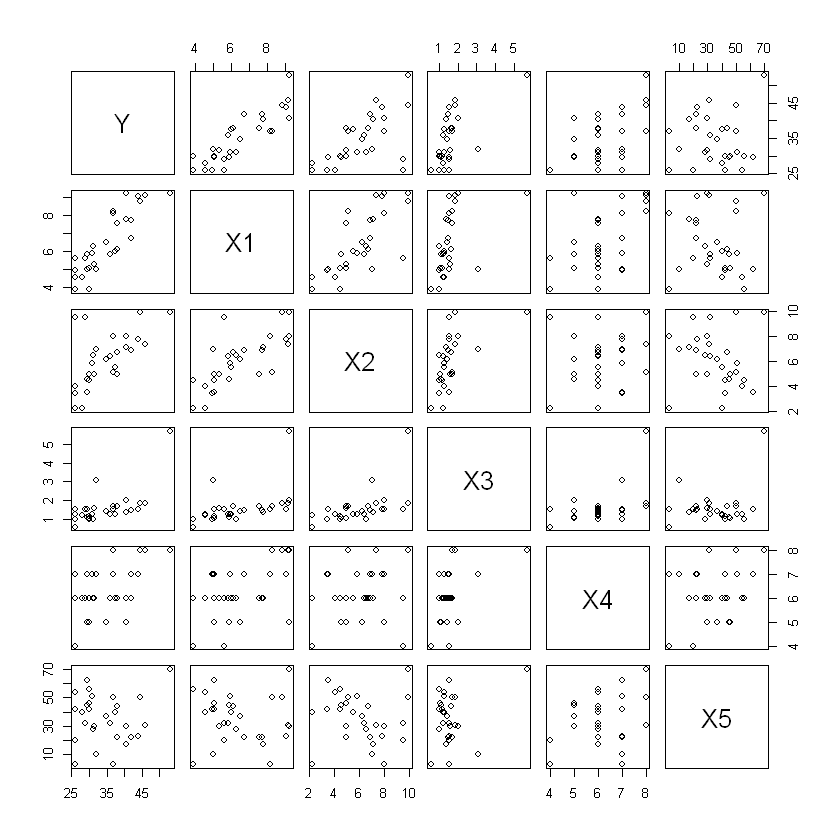

In [25]:
#MATRIZ DE CORRELACIÓN
plot(datos)

#MATRIZ DE CORRELACIONES PARA VARIABLES 
cor(datos)

Usando el metodo de la matriz de correlaciones se tienen dos procesos: 

* Graficamente, Se obtiene la imagen anterior, en la cual se requiere que los datos graficados no sigan un patron Lineal.

* Numericamente se espera que estos candidatos a tener multicolinealidad tengan un valor de $\mid x \mid > 0.5$ para confirmarlos.

Para nuestro caso, se observa que la grafica de $X_2$ vs $X_1$ presenta un patron lineal claro y es la unica que lo presenta, además en la tabla numerica se encuentra que esta tiene un valor de $0.66182194$, por lo cual se conlcuye que a partir de este metodo, hay colinealidad entre $X_1$ y $X_2$.

Además, de la tabla numérica se observa también que la relación entre $X_2$ y $X_3$ tiene un valor de $0.5255517$ sin embargo, esta relación no es tan clara en las graficas, no obstante es posible afirmar que tambien hay colinealidad entre $X_2$ y $X_3$



In [26]:
misDiagnostcolin(modelo)
#misDiagnostcolin(modelo,centrar=T)

Diagnósticos Multicolinealidad - Intercepto incluido 
 Indices de Condición y Proporciones de Varianza 


Val.propio,cond.index,Pi.intercept,Pi.X1,Pi.X2,Pi.X3,Pi.X4,Pi.X5
5.59108571,1.000000,0.0007004781,0.0008286118,0.001413757,0.003779737,0.0005226223,0.003700272
0.18820528,5.450448,0.0015189560,0.0059312855,0.037962414,0.107484437,0.0007718134,0.452022687
0.14903428,6.124984,0.0200980166,0.0136728103,0.011039768,0.565296764,0.0048897770,0.079607897
0.03923823,11.936950,0.0632778323,0.0012919286,0.638154966,0.187669890,0.0809228489,0.374710989
0.02177954,16.022259,0.2948674342,0.7681323223,0.162494514,0.037329157,0.0001440654,0.069723149
0.01065696,22.905057,0.6195372827,0.2101430415,0.148934581,0.098440015,0.9127488731,0.020235005


Por ultimo se usará el criterio del ́ındice de condicion del sistema de valores propios, el cual  indica que:
* $K_j <10$ no hay problemas de multicolinealidad
* $10< K_j <31.6$ hay problemas de multicolinealidad moderada
* $K_j > 31.6$ hay problemas de multicolinealidad graves

 * Ya que $\beta_0$ tiene interpretación estadistica, se debe tomar la tabla sin centrar.
 * cuando se halla multicolinealidad, se buscan dos valores mayores a 0.5 entre las variables para encontrar la multicolinealidad entre las variables.



Para este modelo se puede observar que el indice para $X_3$, $X_4$ y $X_5$ muestran problemas de multicolinealidad moderados, sin embargo no hay más de un valor mayor a 0.5 en ningúna de estas variables, por lo cual, no se puede concluir una relación de multicolinealidad entre las variables.


## 4. Usando el método backward determine cuales son las predictoras que deben estar en el modelo. ¿ Concuerda este modelo con el determinado en primer inciso? Además use los otros criterios vistos en clase para mostrar 2 candidatos a mejor modelo. Argumente.

In [27]:
allregtable(modelo,Y)

NoOfVars,R2,adjR2,SSE,Cp,Variables.in.model
1,0.7678,0.7595,326.7691,6.1475,X1
1,0.3718,0.3494,884.1864,60.9860,X3
1,0.3695,0.3470,887.4472,61.3068,X2
1,0.3031,0.2782,980.9188,70.5025,X4
1,0.0011,-0.0346,1405.9970,112.3216,X5
2,0.8197,0.8063,253.8342,0.9721,X1 X3
2,0.7888,0.7732,297.2065,5.2391,X1 X4
2,0.7778,0.7613,312.7945,6.7726,X1 X5
2,0.7692,0.7521,324.8155,7.9553,X1 X2
2,0.5362,0.5018,652.8124,40.2235,X2 X4
